In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6320 entries, 1995-01-03 to 2020-02-07
Data columns (total 4 columns):
PG      6320 non-null float64
MSFT    6320 non-null float64
F       6320 non-null float64
GE      6320 non-null float64
dtypes: float64(4)
memory usage: 246.9 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.362394,2.420130,3.256691,2.731941
1995-01-04,6.311395,2.437722,3.344314,2.731941
1995-01-05,6.222139,2.397512,3.315107,2.738635
1995-01-06,6.234891,2.437722,3.315107,2.725244
1995-01-09,6.209391,2.422644,3.373522,2.698461


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-02-03,125.110001,174.380005,8.9800,12.26
2020-02-04,125.660004,180.119995,9.1800,12.58
2020-02-05,126.809998,179.899994,8.3100,12.86
2020-02-06,127.139999,183.630005,8.2500,12.95
2020-02-07,126.790001,185.139999,8.1371,13.00


In [6]:
mydata.iloc[0]

PG      6.362394
MSFT    2.420130
F       3.256691
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

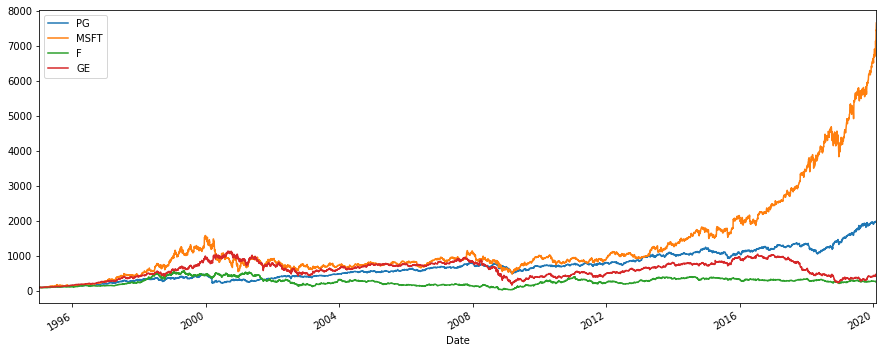

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));
plt.show

In [8]:
mydata.loc['1995-01-03']

PG      6.362394
MSFT    2.420130
F       3.256691
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

In [9]:
mydata.iloc[0]

PG      6.362394
MSFT    2.420130
F       3.256691
GE      2.731941
Name: 1995-01-03 00:00:00, dtype: float64

In [10]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002450
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [11]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [12]:
np.dot(returns, weights)

array([        nan,  0.00653975, -0.00922991, ..., -0.01614587,
        0.00577858, -0.00108841])

In [13]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.142913
MSFT    0.219680
F       0.112814
GE      0.107609
dtype: float64

In [14]:
np.dot(annual_returns, weights)

0.14575412862406134

In [15]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print(pfolio_1)

14.575 %


In [16]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [17]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print(pfolio_2)

16.733999999999998 %


In [18]:
print(pfolio_2)
print(pfolio_1)

16.733999999999998 %
14.575 %
